## 8.1 membres du comité cantonal entre 1974 et 1985

In [7]:
import sqlite3
import pandas 
import matplotlib.pyplot as plt
import seaborn as sns


connection = sqlite3.connect('C:/Users/LZender/Documents/Travail/unine/histoire/mémoire/AEN/grand_conseil/memoire_POP/liste_grand_conseil.db')


cursor = connection.cursor()

In [8]:
df_comite_cantonal_noms = pandas.read_sql("""
SELECT pe.nom as nom, pe.prenom as prenom, pe.genre as genre, f.nom as delegue, e.annee_debut as debut, e.annee_fin as fin FROM personne as pe
LEFT JOIN exercice as e ON e.fk_personne = pe.pk_personne
LEFT JOIN fonction as f ON f.pk_fonction = e.fk_fonction

where f.pk_fonction is not null AND f.nom ='comite_cantonal'
group by pk_personne
order by debut ASC
""", connection)

df_comite_cantonal_noms.head(30)

,nom,prenom,genre,delegue,debut,fin
0,blant-mojon,colette,F,comite_cantonal,1974.0,1978.0
1,corswant_hirsch,marcelle,F,comite_cantonal,1974.0,1983.0
2,beuret,helene,F,comite_cantonal,1974.0,1978.0
3,greub,margot,F,comite_cantonal,1974.0,1982.0
4,Eplattenier,lily,F,comite_cantonal,1974.0,1978.0
5,duvanel,jean,M,comite_cantonal,1974.0,1974.0
6,hirschi,gerard,M,comite_cantonal,1974.0,1978.0
7,guillod,jacques,M,comite_cantonal,1974.0,1978.0
8,dind,jacques,M,comite_cantonal,1974.0,1974.0
9,gremaud,armand,M,comite_cantonal,1974.0,1974.0


In [9]:
df_comite_cantonal_noms.to_csv('CSV/question_08_membres_comité_cantonal.csv')

## 8.2 répartition par genre du comité cantonal

In [10]:
annees = list(range(1973, 1988, 2))

periodes = []

for index, annee_item in enumerate(annees):
    if index + 1 < len(annees):
        periodes.append({
            'start': annees[index],
            'end': annees[index + 1] - 1
        })

for periode_item in periodes:
    start = periode_item['start']
    end = periode_item['end']

    # Femmes
    cursor.execute("""
    SELECT COUNT(DISTINCT pe.pk_personne)
    FROM personne AS pe
    LEFT JOIN exercice AS e ON e.fk_personne = pe.pk_personne
    LEFT JOIN fonction AS f ON f.pk_fonction = e.fk_fonction
    WHERE f.pk_fonction IS NOT NULL
      AND f.nom = 'comite_cantonal'
      AND pe.genre = 'F'
      AND e.annee_debut <= ?
      AND (e.annee_fin IS NULL OR e.annee_fin >= ?)
    """, [end, start])

    nb_femmes = cursor.fetchone()[0]

    # Hommes
    cursor.execute("""
    SELECT COUNT(DISTINCT pe.pk_personne)
    FROM personne AS pe
    LEFT JOIN exercice AS e ON e.fk_personne = pe.pk_personne
    LEFT JOIN fonction AS f ON f.pk_fonction = e.fk_fonction
    WHERE f.pk_fonction IS NOT NULL
      AND f.nom = 'comite_cantonal'
      AND pe.genre = 'M'
      AND e.annee_debut <= ?
      AND (e.annee_fin IS NULL OR e.annee_fin >= ?)
    """, [end, start])

    nb_hommes = cursor.fetchone()[0]

    periode_item['nb_femmes'] = nb_femmes
    periode_item['nb_hommes'] = nb_hommes

# Affichage des résultats
for periode in periodes:
    print(f"période {periode['start']}-{periode['end']}:")
    print(f"  femmes : {periode['nb_femmes']}")
    print(f"  hommes : {periode['nb_hommes']}\n")


période 1973-1974:
  femmes : 6
  hommes : 20

période 1975-1976:
  femmes : 9
  hommes : 19

période 1977-1978:
  femmes : 10
  hommes : 17

période 1979-1980:
  femmes : 6
  hommes : 18

période 1981-1982:
  femmes : 6
  hommes : 18

période 1983-1984:
  femmes : 4
  hommes : 19

période 1985-1986:
  femmes : 3
  hommes : 14



In [11]:
df_comite_cantonal = pandas.DataFrame.from_dict(periodes)

df_comite_cantonal['total'] = df_comite_cantonal['nb_femmes'] + df_comite_cantonal['nb_hommes']

df_comite_cantonal['pourcentage_femmes'] = df_comite_cantonal['nb_femmes'] / df_comite_cantonal['total'] * 100.00
df_comite_cantonal['pourcentage_hommes'] = df_comite_cantonal['nb_hommes'] / df_comite_cantonal['total'] * 100.00

df_comite_cantonal.head(10)

,start,end,nb_femmes,nb_hommes,total,pourcentage_femmes,pourcentage_hommes
0,1973,1974,6,20,26,23.076923,76.923077
1,1975,1976,9,19,28,32.142857,67.857143
2,1977,1978,10,17,27,37.037037,62.962963
3,1979,1980,6,18,24,25.000000,75.000000
4,1981,1982,6,18,24,25.000000,75.000000
5,1983,1984,4,19,23,17.391304,82.608696
6,1985,1986,3,14,17,17.647059,82.352941


In [12]:
df_copy_comite_cantonal = df_comite_cantonal.drop(columns=['nb_femmes', 'nb_hommes', 'total'])

df_copy_comite_cantonal.head()

df_copy_comite_cantonal.to_csv('CSV/question_08_comité_cantonal.csv')

### répartition par période en graphe

In [13]:
df_modif_comite_cantonal = df_copy_comite_cantonal.copy()
df_modif_comite_cantonal['periodes'] = df_modif_comite_cantonal['start'].astype(str) + ' ' + df_modif_comite_cantonal['end'].astype(str)
df_modif_comite_cantonal = df_modif_comite_cantonal.drop(columns=['start', 'end'])


df_modif_comite_cantonal.head()

,pourcentage_femmes,pourcentage_hommes,periodes
0,23.076923,76.923077,1973 1974
1,32.142857,67.857143,1975 1976
2,37.037037,62.962963,1977 1978
3,25.000000,75.000000,1979 1980
4,25.000000,75.000000,1981 1982


In [14]:
df_long_comite_cantonal = df_modif_comite_cantonal.melt(
    id_vars='periodes',
    value_vars=['pourcentage_femmes', 'pourcentage_hommes'],
    var_name='genre',
    value_name='pourcentage'
)

df_long_comite_cantonal.head()

,periodes,genre,pourcentage
0,1973 1974,pourcentage_femmes,23.076923
1,1975 1976,pourcentage_femmes,32.142857
2,1977 1978,pourcentage_femmes,37.037037
3,1979 1980,pourcentage_femmes,25.000000
4,1981 1982,pourcentage_femmes,25.000000


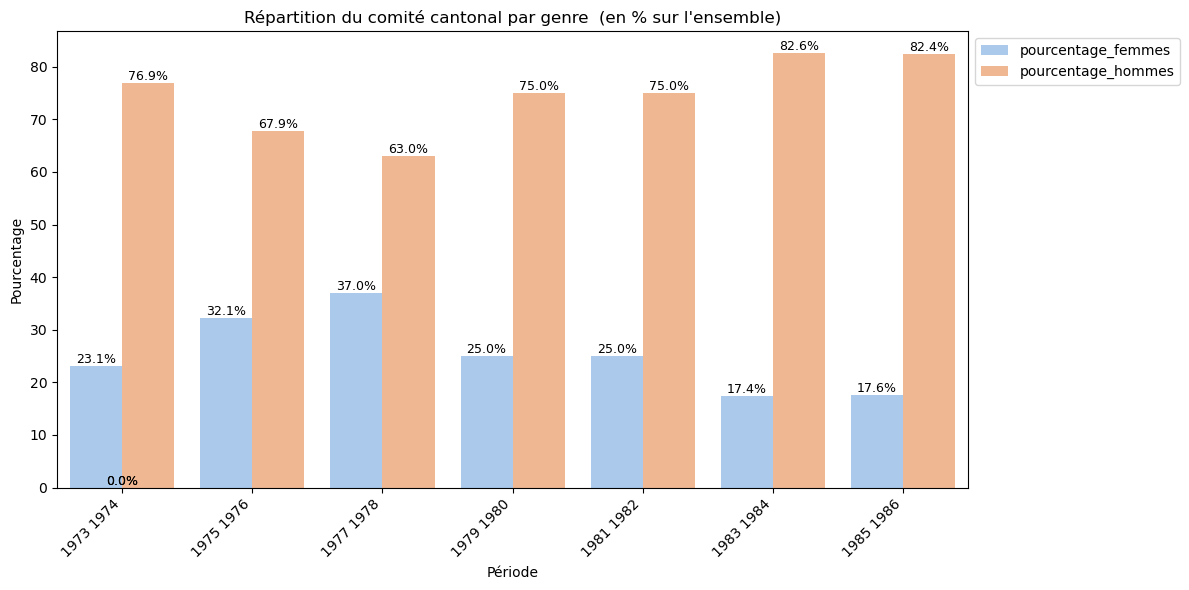

In [15]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_long_comite_cantonal, x='periodes', y='pourcentage', hue='genre', palette='pastel')

# Rotation des labels x
plt.xticks(rotation=45, ha='right')

# Titre et axes
plt.title("Répartition du comité cantonal par genre  (en % sur l'ensemble)")
plt.ylabel("Pourcentage")
plt.xlabel("Période")

# Ajouter les valeurs sur les barres
for p in ax.patches:
    hauteur = p.get_height()
    if not pandas.isna(hauteur):  # au cas où il y a des NaN
        ax.annotate(f'{hauteur:.1f}%', 
                    (p.get_x() + p.get_width() / 2., hauteur),
                    ha='center', va='bottom', fontsize=9)
        
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ajustement des marges
plt.tight_layout()

# Sauvegarde
plt.savefig('images/question_08_comité_cantonal_avec_valeurs.jpg', dpi=300, bbox_inches='tight')
plt.show()


### 8.2.1 membres femmes du comité cantonal entre 1974 et 1985

In [16]:
df_comite_cantonal_F = pandas.read_sql("""
SELECT pe.nom as nom, pe.prenom as prenom, pe.genre as genre, f.nom as delegue, e.annee_debut as debut, e.annee_fin as fin FROM personne as pe
LEFT JOIN exercice as e ON e.fk_personne = pe.pk_personne
LEFT JOIN fonction as f ON f.pk_fonction = e.fk_fonction

where f.pk_fonction is not null AND f.nom ='comite_cantonal'AND pe.genre='F'
group by pk_personne
order by debut ASC
""", connection)

df_comite_cantonal_F.head(1000)

,nom,prenom,genre,delegue,debut,fin
0,blant-mojon,colette,F,comite_cantonal,1974.0,1978.0
1,corswant_hirsch,marcelle,F,comite_cantonal,1974.0,1983.0
2,beuret,helene,F,comite_cantonal,1974.0,1978.0
3,greub,margot,F,comite_cantonal,1974.0,1982.0
4,Eplattenier,lily,F,comite_cantonal,1974.0,1978.0
5,roulet,ginette,F,comite_cantonal,1974.0,1974.0
6,steigmeier,luce,F,comite_cantonal,1975.0,1976.0
7,bottani,anna,F,comite_cantonal,1976.0,1977.0
8,grasso,elisabeth,F,comite_cantonal,1976.0,1978.0
9,vuillemin,marlyse,F,comite_cantonal,1976.0,1976.0


In [17]:
df_comite_cantonal_F.to_csv('CSV/question_08_comité_cantonal_F.csv')

## 8.3 répartition socio-professionnelle dans le comité

In [18]:
df_comite_cantonal_metier = pandas.read_sql("""
SELECT 
COUNT (pk_type_M) as count_type_metier, tm.definition as metier, pe.genre as genre
FROM personne as pe
LEFT JOIN travaille as t ON t.fk_personne = pe.pk_personne
LEFT JOIN metier as m ON m.pk_metier = t.fk_metier
LEFT JOIN type_M  as tm on tm.pk_type_M = m.fk_type_M
LEFT JOIN exercice as e ON e.fk_personne = pe.pk_personne
LEFT JOIN fonction as f ON f.pk_fonction = e.fk_fonction

where f.pk_fonction is not null AND f.nom ='comite_cantonal' AND tm.pk_type_M is not null
group by metier, genre
ORDER BY count_type_metier DESC
""", connection)

# Total général sur l'ensemble des lignes
total_general = df_comite_cantonal_metier['count_type_metier'].sum()

# Pourcentage sur l'ensemble des métiers recensés
df_comite_cantonal_metier['pourcentage'] = df_comite_cantonal_metier['count_type_metier'] / total_general * 100.0

# Optionnel : réinitialiser l'index pour une table bien propre
df_comite_cantonal_metier = df_comite_cantonal_metier.reset_index(drop=True)

# Affichage du résultat
print(df_comite_cantonal_metier[['genre', 'metier', 'count_type_metier', 'pourcentage']])


   genre                   metier  count_type_metier  pourcentage
0      M           usine_batiment                 14    25.000000
1      M                education                 10    17.857143
2      F               domestique                  6    10.714286
3      M         service_publique                  5     8.928571
4      F                education                  4     7.142857
5      F           usine_batiment                  4     7.142857
6      M          artisanat_vente                  2     3.571429
7      M  restauration_hotellerie                  2     3.571429
8      F             santé_social                  2     3.571429
9      M             santé_social                  2     3.571429
10     M               domestique                  1     1.785714
11     M            droit_finance                  1     1.785714
12     F           employe_bureau                  1     1.785714
13     M   impression_journalisme                  1     1.785714
14     F  

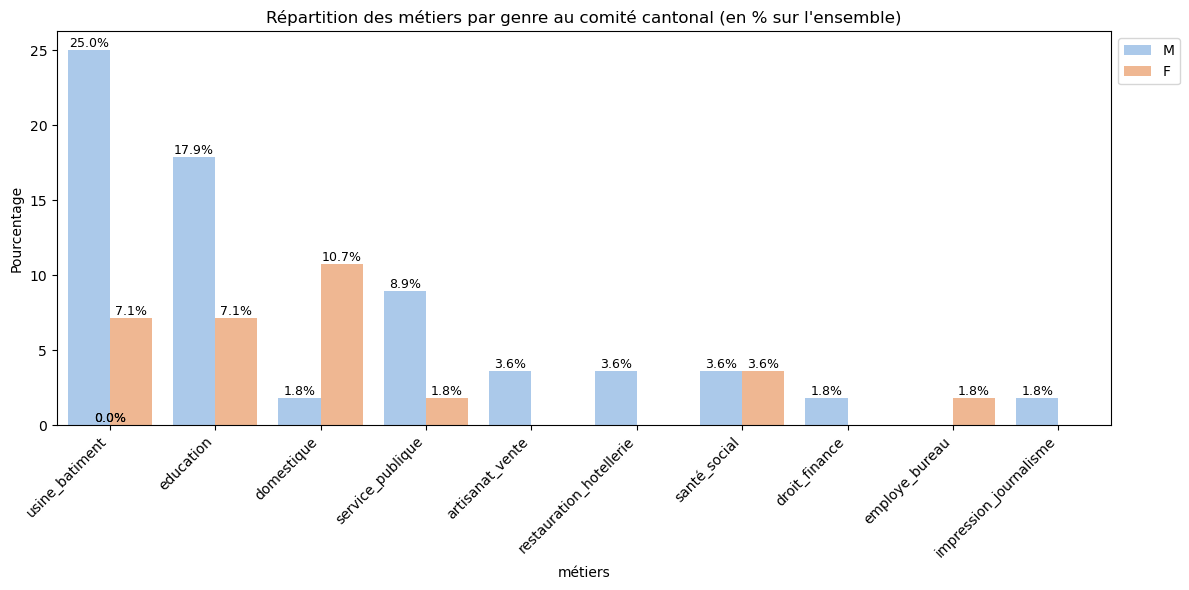

In [26]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_comite_cantonal_metier, x='metier', y='pourcentage', hue='genre', palette='pastel')

# Rotation des labels x
plt.xticks(rotation=45, ha='right')

# Titre et axes
plt.title("Répartition des métiers par genre au comité cantonal (en % sur l'ensemble)")
plt.ylabel("Pourcentage")
plt.xlabel("métiers")

# Ajouter les valeurs sur les barres
for p in ax.patches:
    hauteur = p.get_height()
    if not pandas.isna(hauteur):  # au cas où il y a des NaN
        ax.annotate(f'{hauteur:.1f}%', 
                    (p.get_x() + p.get_width() / 2., hauteur),
                    ha='center', va='bottom', fontsize=9)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ajustement des marges
plt.tight_layout()

# Sauvegarde
plt.savefig('images/question_08_metier_comite_cantonal_genre_avec_valeurs.jpg', dpi=300, bbox_inches='tight')
plt.show()

### 8.3.1 répartition socio-professionnelle chez les militantEs dans le comité

In [20]:
df_comite_cantonal_metier_F = pandas.read_sql("""
SELECT 
COUNT (pk_type_M) as count_type_metier, tm.definition as metier, pe.genre as genre
FROM personne as pe
LEFT JOIN travaille as t ON t.fk_personne = pe.pk_personne
LEFT JOIN metier as m ON m.pk_metier = t.fk_metier
LEFT JOIN type_M  as tm on tm.pk_type_M = m.fk_type_M
LEFT JOIN exercice as e ON e.fk_personne = pe.pk_personne
LEFT JOIN fonction as f ON f.pk_fonction = e.fk_fonction

where f.pk_fonction is not null AND f.nom ='comite_cantonal' AND tm.pk_type_M is not null AND pe.genre='F'
group by metier, genre
ORDER BY count_type_metier DESC
""", connection)

# Total général sur l'ensemble des lignes
total_general = df_comite_cantonal_metier_F['count_type_metier'].sum()

# Pourcentage sur l'ensemble des métiers recensés
df_comite_cantonal_metier_F['pourcentage'] = df_comite_cantonal_metier_F['count_type_metier'] / total_general * 100.0

# Optionnel : réinitialiser l'index pour une table bien propre
df_comite_cantonal_metier_F = df_comite_cantonal_metier_F.reset_index(drop=True)

# Affichage du résultat
print(df_comite_cantonal_metier_F[['genre', 'metier', 'count_type_metier', 'pourcentage']])

  genre            metier  count_type_metier  pourcentage
0     F        domestique                  6    33.333333
1     F         education                  4    22.222222
2     F    usine_batiment                  4    22.222222
3     F      santé_social                  2    11.111111
4     F    employe_bureau                  1     5.555556
5     F  service_publique                  1     5.555556


C:\Users\LZender\AppData\Local\Temp\ipykernel_19028\3383537986.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_comite_cantonal_metier_F, x='metier', y='pourcentage', palette='pastel')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


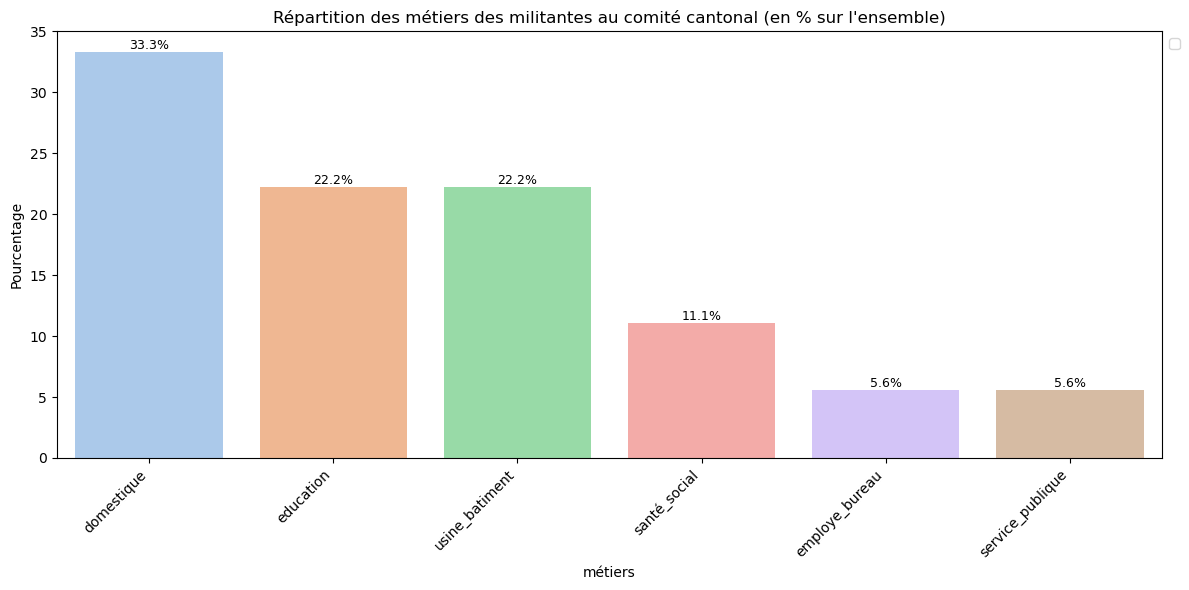

In [25]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_comite_cantonal_metier_F, x='metier', y='pourcentage', palette='pastel')

# Rotation des labels x
plt.xticks(rotation=45, ha='right')

# Titre et axes
plt.title("Répartition des métiers des militantes au comité cantonal (en % sur l'ensemble)")
plt.ylabel("Pourcentage")
plt.xlabel("métiers")

# Ajouter les valeurs sur les barres
for p in ax.patches:
    hauteur = p.get_height()
    if not pandas.isna(hauteur):  # au cas où il y a des NaN
        ax.annotate(f'{hauteur:.1f}%', 
                    (p.get_x() + p.get_width() / 2., hauteur),
                    ha='center', va='bottom', fontsize=9)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ajustement des marges
plt.tight_layout()

# Sauvegarde
plt.savefig('images/question_08_metier_comite_cantonal_F_avec_valeurs.jpg', dpi=300, bbox_inches='tight')
plt.show()

### 8.3.2 répartition socio-professionnelle chez les militants dans le comité

In [24]:
df_comite_cantonal_metier_M = pandas.read_sql("""
SELECT 
COUNT (pk_type_M) as count_type_metier, tm.definition as metier, pe.genre as genre
FROM personne as pe
LEFT JOIN travaille as t ON t.fk_personne = pe.pk_personne
LEFT JOIN metier as m ON m.pk_metier = t.fk_metier
LEFT JOIN type_M  as tm on tm.pk_type_M = m.fk_type_M
LEFT JOIN exercice as e ON e.fk_personne = pe.pk_personne
LEFT JOIN fonction as f ON f.pk_fonction = e.fk_fonction

where f.pk_fonction is not null AND f.nom ='comite_cantonal' AND tm.pk_type_M is not null AND pe.genre='M'
group by metier, genre
ORDER BY count_type_metier DESC
""", connection)

# Total général sur l'ensemble des lignes
total_general = df_comite_cantonal_metier_M['count_type_metier'].sum()

# Pourcentage sur l'ensemble des métiers recensés
df_comite_cantonal_metier_M['pourcentage'] = df_comite_cantonal_metier_M['count_type_metier'] / total_general * 100.0

# Optionnel : réinitialiser l'index pour une table bien propre
df_comite_cantonal_metier_M = df_comite_cantonal_metier_M.reset_index(drop=True)

# Affichage du résultat
print(df_comite_cantonal_metier_M[['genre', 'metier', 'count_type_metier', 'pourcentage']])

  genre                   metier  count_type_metier  pourcentage
0     M           usine_batiment                 14    36.842105
1     M                education                 10    26.315789
2     M         service_publique                  5    13.157895
3     M          artisanat_vente                  2     5.263158
4     M  restauration_hotellerie                  2     5.263158
5     M             santé_social                  2     5.263158
6     M               domestique                  1     2.631579
7     M            droit_finance                  1     2.631579
8     M   impression_journalisme                  1     2.631579


C:\Users\LZender\AppData\Local\Temp\ipykernel_19028\1954144618.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_comite_cantonal_metier_M, x='metier', y='pourcentage', palette='pastel')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


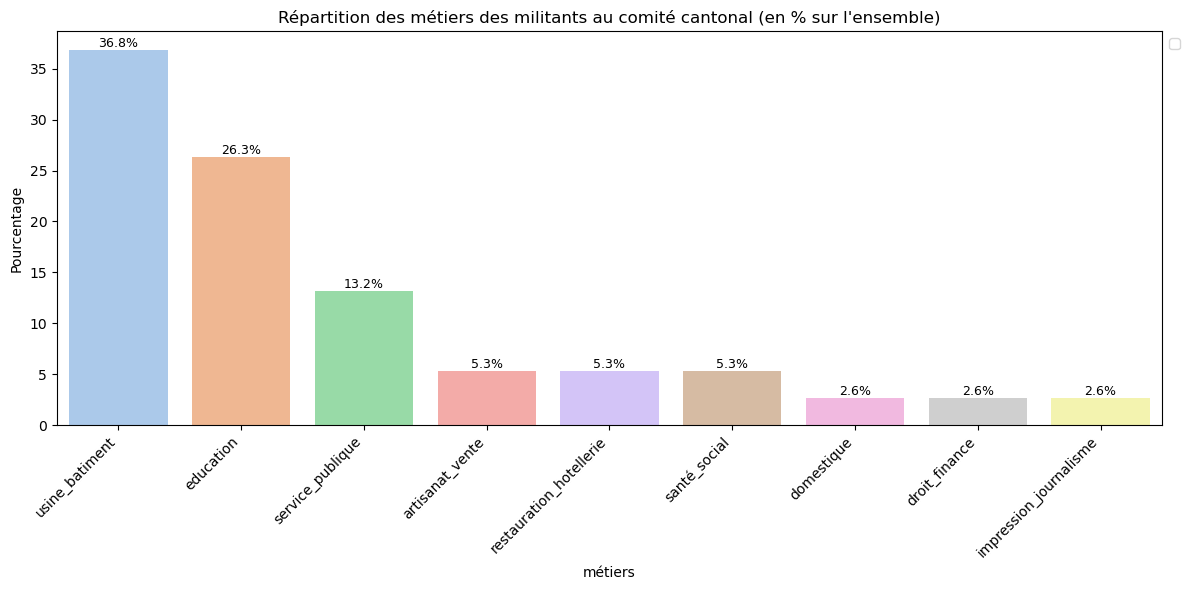

In [27]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_comite_cantonal_metier_M, x='metier', y='pourcentage', palette='pastel')

# Rotation des labels x
plt.xticks(rotation=45, ha='right')

# Titre et axes
plt.title("Répartition des métiers des militants au comité cantonal (en % sur l'ensemble)")
plt.ylabel("Pourcentage")
plt.xlabel("métiers")

# Ajouter les valeurs sur les barres
for p in ax.patches:
    hauteur = p.get_height()
    if not pandas.isna(hauteur):  # au cas où il y a des NaN
        ax.annotate(f'{hauteur:.1f}%', 
                    (p.get_x() + p.get_width() / 2., hauteur),
                    ha='center', va='bottom', fontsize=9)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ajustement des marges
plt.tight_layout()

# Sauvegarde
plt.savefig('images/question_08_metier_comite_cantonal_M_avec_valeurs.jpg', dpi=300, bbox_inches='tight')
plt.show()